In [1]:
import aurel
import numpy as np
from aurel.solutions import Conformally_flat as sol
from scipy.interpolate import RegularGridInterpolator
import spinsfast
import matplotlib.pyplot as plt
import os
os.environ["SIMLOC"] = "/Users/rlm36AA/simulations/"

param = aurel.parameters('tov_ET')
fd = aurel.FiniteDifference(param)
aurel.iterations(param, skip_last = False)

4th order finite difference schemes are defined

 === restart 0
Reading /Users/rlm36AA/simulations/tov_ET/output-0000/tov_ET/gxx.file_2.h5
it = 0 -> 409600
rl = 0 at it = np.arange(0, 409600, 4096)
rl = 1 at it = np.arange(0, 409600, 4096)


out_mode = 'onefile', one_file_per_group = yes DONE
out_mode = 'onefile', one_file_per_group = no DONE
out_mode = 'proc', one_file_per_group = no DONE

In [2]:
data = aurel.read_data(
    param, 
    ['rho0', 'velup3', 'press', 'w_lorentz', 'eps',
     'alpha', 'dtalpha', 'betaup3', 'dtbetaup3', 'gammadown3', 'Kdown3',
     'Ktrace', 'Hamiltonian', 'Momentumup3', 'Weyl_Psi'],
    it = np.arange(0, 409600, 4096),
    verbose=True)

Data read from split iterations: []
Variables read from ET files: ['kzz', 'dtbetax', 'Momentumy', 'w_lorentz', 'betay', 't', 'Ktrace', 'gyy', 'kyy', 'Momentumx', 'dtbetay', 'rho0', 'gxz', 'kxy', 'dtbetaz', 'Hamiltonian', 'kxz', 'Weyl_Psi4r', 'it', 'gxx', 'dtalpha', 'velx', 'gxy', 'gzz', 'kxx', 'eps', 'press', 'Weyl_Psi4i', 'betax', 'betaz', 'gyz', 'kyz', 'alpha', 'vely', 'Momentumz', 'velz']
Variables saved to split iterations files: ['kzz', 'dtbetax', 'Momentumy', 'w_lorentz', 'betay', 't', 'Ktrace', 'gyy', 'kyy', 'Momentumx', 'dtbetay', 'rho0', 'gxz', 'kxy', 'dtbetaz', 'Hamiltonian', 'kxz', 'Weyl_Psi4r', 'gxx', 'dtalpha', 'velx', 'gxy', 'gzz', 'kxx', 'eps', 'press', 'Weyl_Psi4i', 'betax', 'betaz', 'gyz', 'kyz', 'alpha', 'vely', 'Momentumz', 'velz']


In [3]:
rel = aurel.AurelCore(fd)
rel.load_data(data, 0)
rel["Psi4_lm"][2,2]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

np.complex128(2.367244782843992e-11+9.742829222451099e-11j)

In [4]:
psi4_22 = []
psi4_20 = []
psi4_40 = []
for it_index in range(len(data['it'])):
    rel = aurel.AurelCore(fd, verbose=False)
    rel.load_data(data, it_index)
    psi4_22 += [rel["Psi4_lm"][2,2]]
    psi4_20 += [rel["Psi4_lm"][2,0]]
    psi4_40 += [rel["Psi4_lm"][4,0]]
    r = rel.Psi4_lm_radius
    del rel

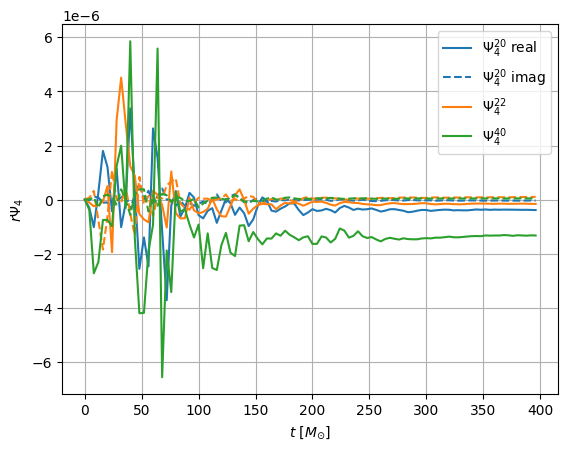

In [5]:
plt.plot(data['t'], r * np.real(psi4_20), color='C0', label=r'$\Psi_4^{20}$ real')
plt.plot(data['t'], r * np.imag(psi4_20), linestyle='--', color='C0', label=r'$\Psi_4^{20}$ imag')
plt.plot(data['t'], r * np.real(psi4_22), color='C1', label=r'$\Psi_4^{22}$')
plt.plot(data['t'], r * np.imag(psi4_22), linestyle='--', color='C1')
plt.plot(data['t'], r * np.real(psi4_40), color='C2', label=r'$\Psi_4^{40}$')
plt.plot(data['t'], r * np.imag(psi4_40), linestyle='--', color='C2')
plt.grid()
plt.ylabel(r'$r \Psi_4$')
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.legend()